In [156]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [108]:
data = pd.read_csv('data/zillow_data.csv')

# Step 3: EDA and Visualization

In [133]:
font = {'family' : 'Times',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [33]:
df.head(3)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900


In [50]:
df.RegionName.nunique()

14723

In [51]:
df.head(1)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600


In [110]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
#     return melted.groupby('time').aggregate({'value':'mean'})
    melted.set_index('time', inplace=True)
    return melted

In [111]:
df = melt_data(data)

/var/folders/s6/jlb2zd1s5gq39tnl2x_y5z_r0000gn/T/ipykernel_54244/4249475289.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)


In [61]:
for col in ['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName']:
    df[col] = data[col]

In [78]:
df

,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,time,value
time,,,,,,,,,
1996-04-01,60657,84654,1,Chicago,IL,Chicago,Cook,1996-04-01,334200.0
1996-04-01,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.0
1996-04-01,77494,91982,3,Katy,TX,Houston,Harris,1996-04-01,210400.0
1996-04-01,60614,84616,4,Chicago,IL,Chicago,Cook,1996-04-01,498100.0
1996-04-01,79936,93144,5,El Paso,TX,El Paso,El Paso,1996-04-01,77300.0
...,...,...,...,...,...,...,...,...,...
2018-04-01,1338,58333,14719,Ashfield,MA,Greenfield Town,Franklin,2018-04-01,209300.0
2018-04-01,3293,59107,14720,Woodstock,NH,Claremont,Grafton,2018-04-01,225800.0
2018-04-01,40404,75672,14721,Berea,KY,Richmond,Madison,2018-04-01,133400.0


In [112]:
grouped = df.groupby('time').aggregate({'value':'mean'})
years = grouped.resample('1Y').mean()

In [211]:
grouped

,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312
...,...
2017-12-01,281095.320247
2018-01-01,282657.060382
2018-02-01,284368.688447


In [84]:
df

,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,time,value
time,,,,,,,,,
1996-04-01,60657,84654,1,Chicago,IL,Chicago,Cook,1996-04-01,334200.0
1996-04-01,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.0
1996-04-01,77494,91982,3,Katy,TX,Houston,Harris,1996-04-01,210400.0
1996-04-01,60614,84616,4,Chicago,IL,Chicago,Cook,1996-04-01,498100.0
1996-04-01,79936,93144,5,El Paso,TX,El Paso,El Paso,1996-04-01,77300.0
...,...,...,...,...,...,...,...,...,...
2018-04-01,1338,58333,14719,Ashfield,MA,Greenfield Town,Franklin,2018-04-01,209300.0
2018-04-01,3293,59107,14720,Woodstock,NH,Claremont,Grafton,2018-04-01,225800.0
2018-04-01,40404,75672,14721,Berea,KY,Richmond,Madison,2018-04-01,133400.0


In [113]:
df.isnull().sum()

RegionName         0
RegionID           0
SizeRank           0
City               0
State              0
Metro         236023
CountyName         0
value              0
dtype: int64

In [114]:
df.shape

(3744704, 8)

# Identifying Trends

A simple line plot for average prices across all 264 months.

In [224]:
roll_mean = grouped.rolling(window=8, center=False).mean()
roll_std = grouped.rolling(window=8, center=False).std()

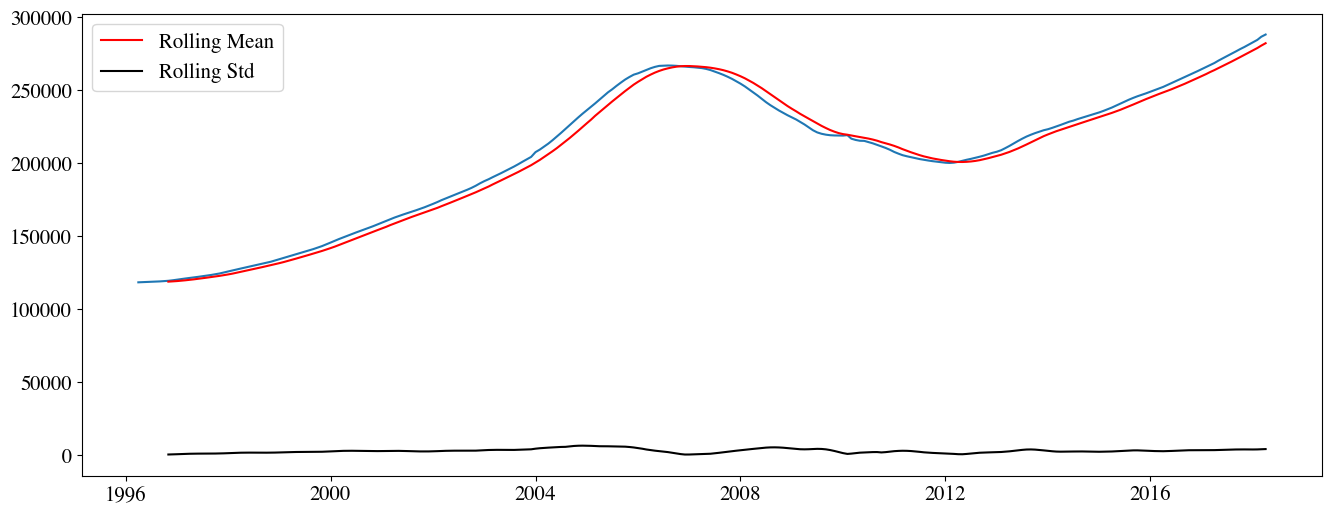

In [225]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(grouped);
ax.plot(roll_mean, color='red', label='Rolling Mean')
ax.plot(roll_std, color='black', label = 'Rolling Std')
ax.legend(loc='best')

In [90]:
df.isnull().sum()

RegionName         0
RegionID           0
SizeRank           0
City               0
State              0
Metro         236023
CountyName         0
value              0
dtype: int64

Line plots for the prices within each year.

In [172]:
year_groups = grouped.groupby(pd.Grouper(freq ='A'))
df_year_groups = df['value'].groupby(pd.Grouper(freq='A'))

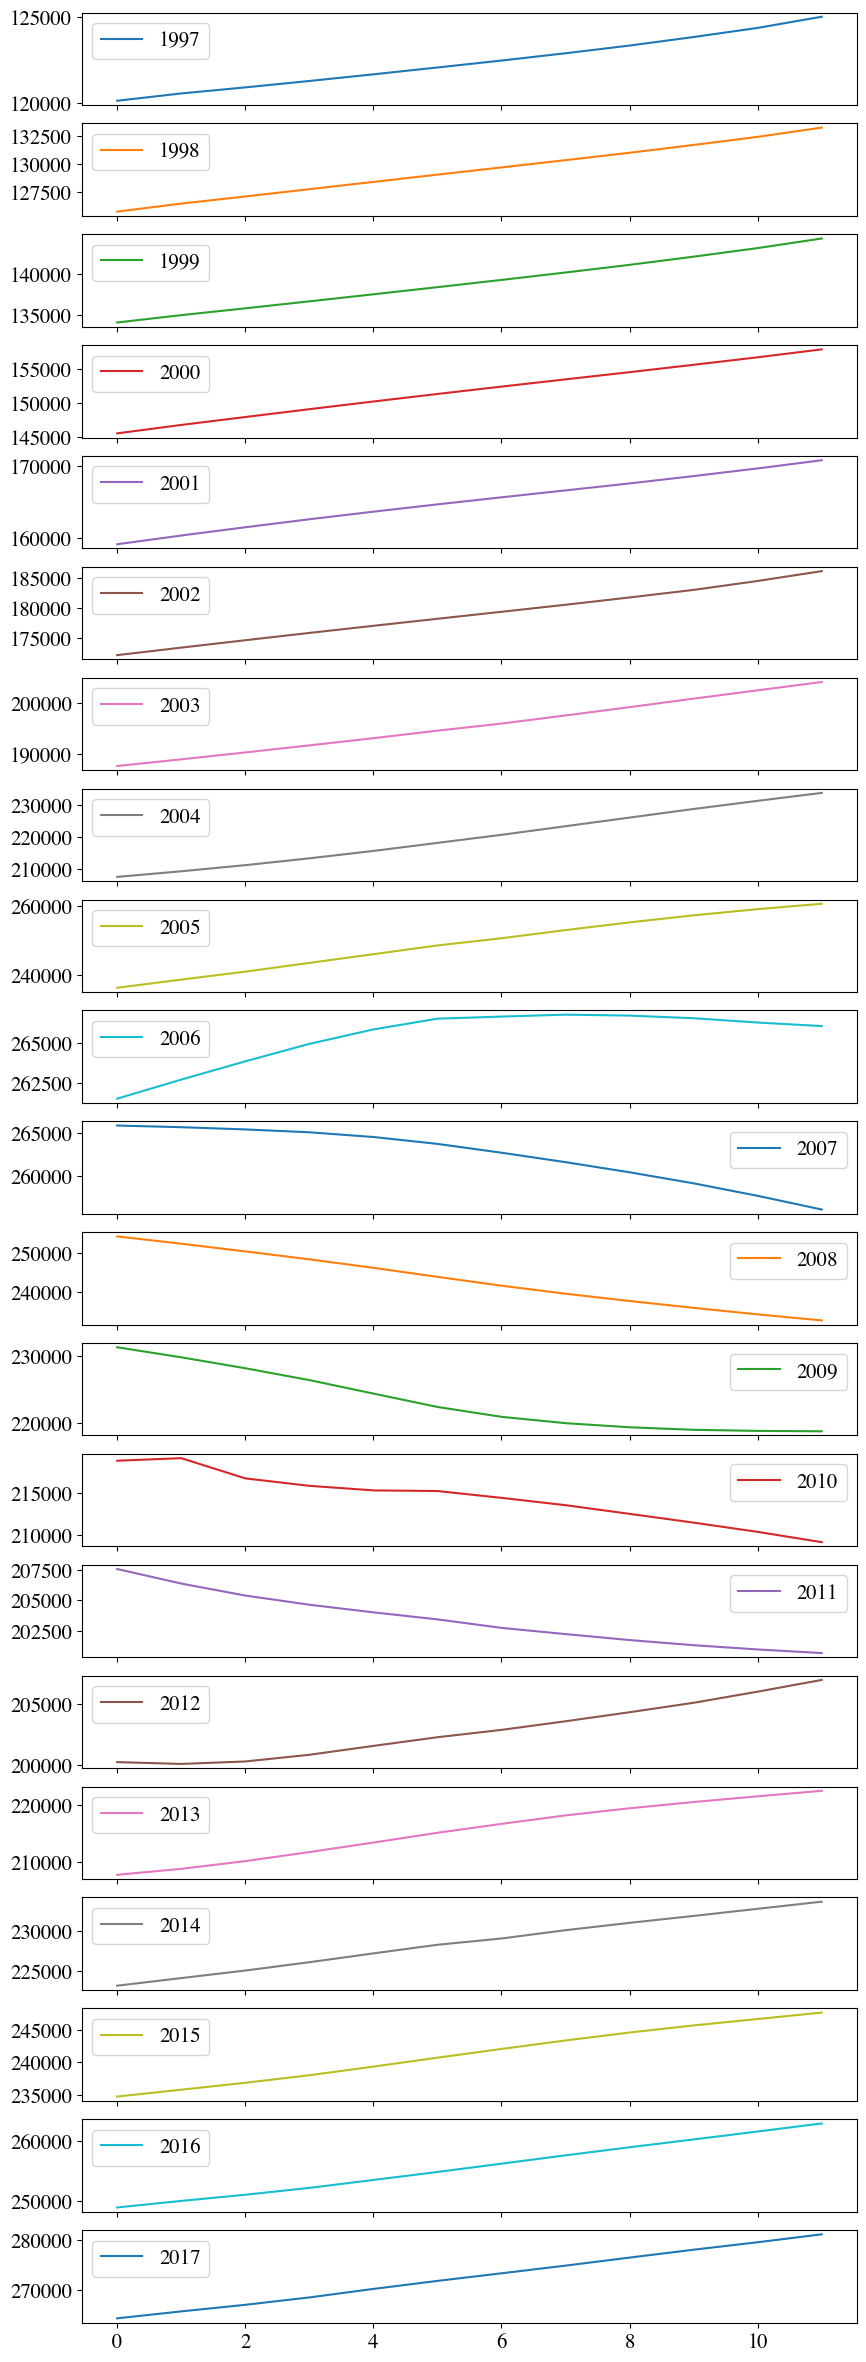

In [219]:
df_annual = pd.DataFrame()

for yr, group in year_groups:
    if len(group.values) == 12:
        df_annual[yr.year] = group.values.ravel()
    
df_annual.plot(figsize = (10,30), subplots=True, legend=True);

Boxplots for prices within each year. You can see the same trends as the original line plot. It seems like the stock market crash of '08 disrupted the natrual yearly trend.

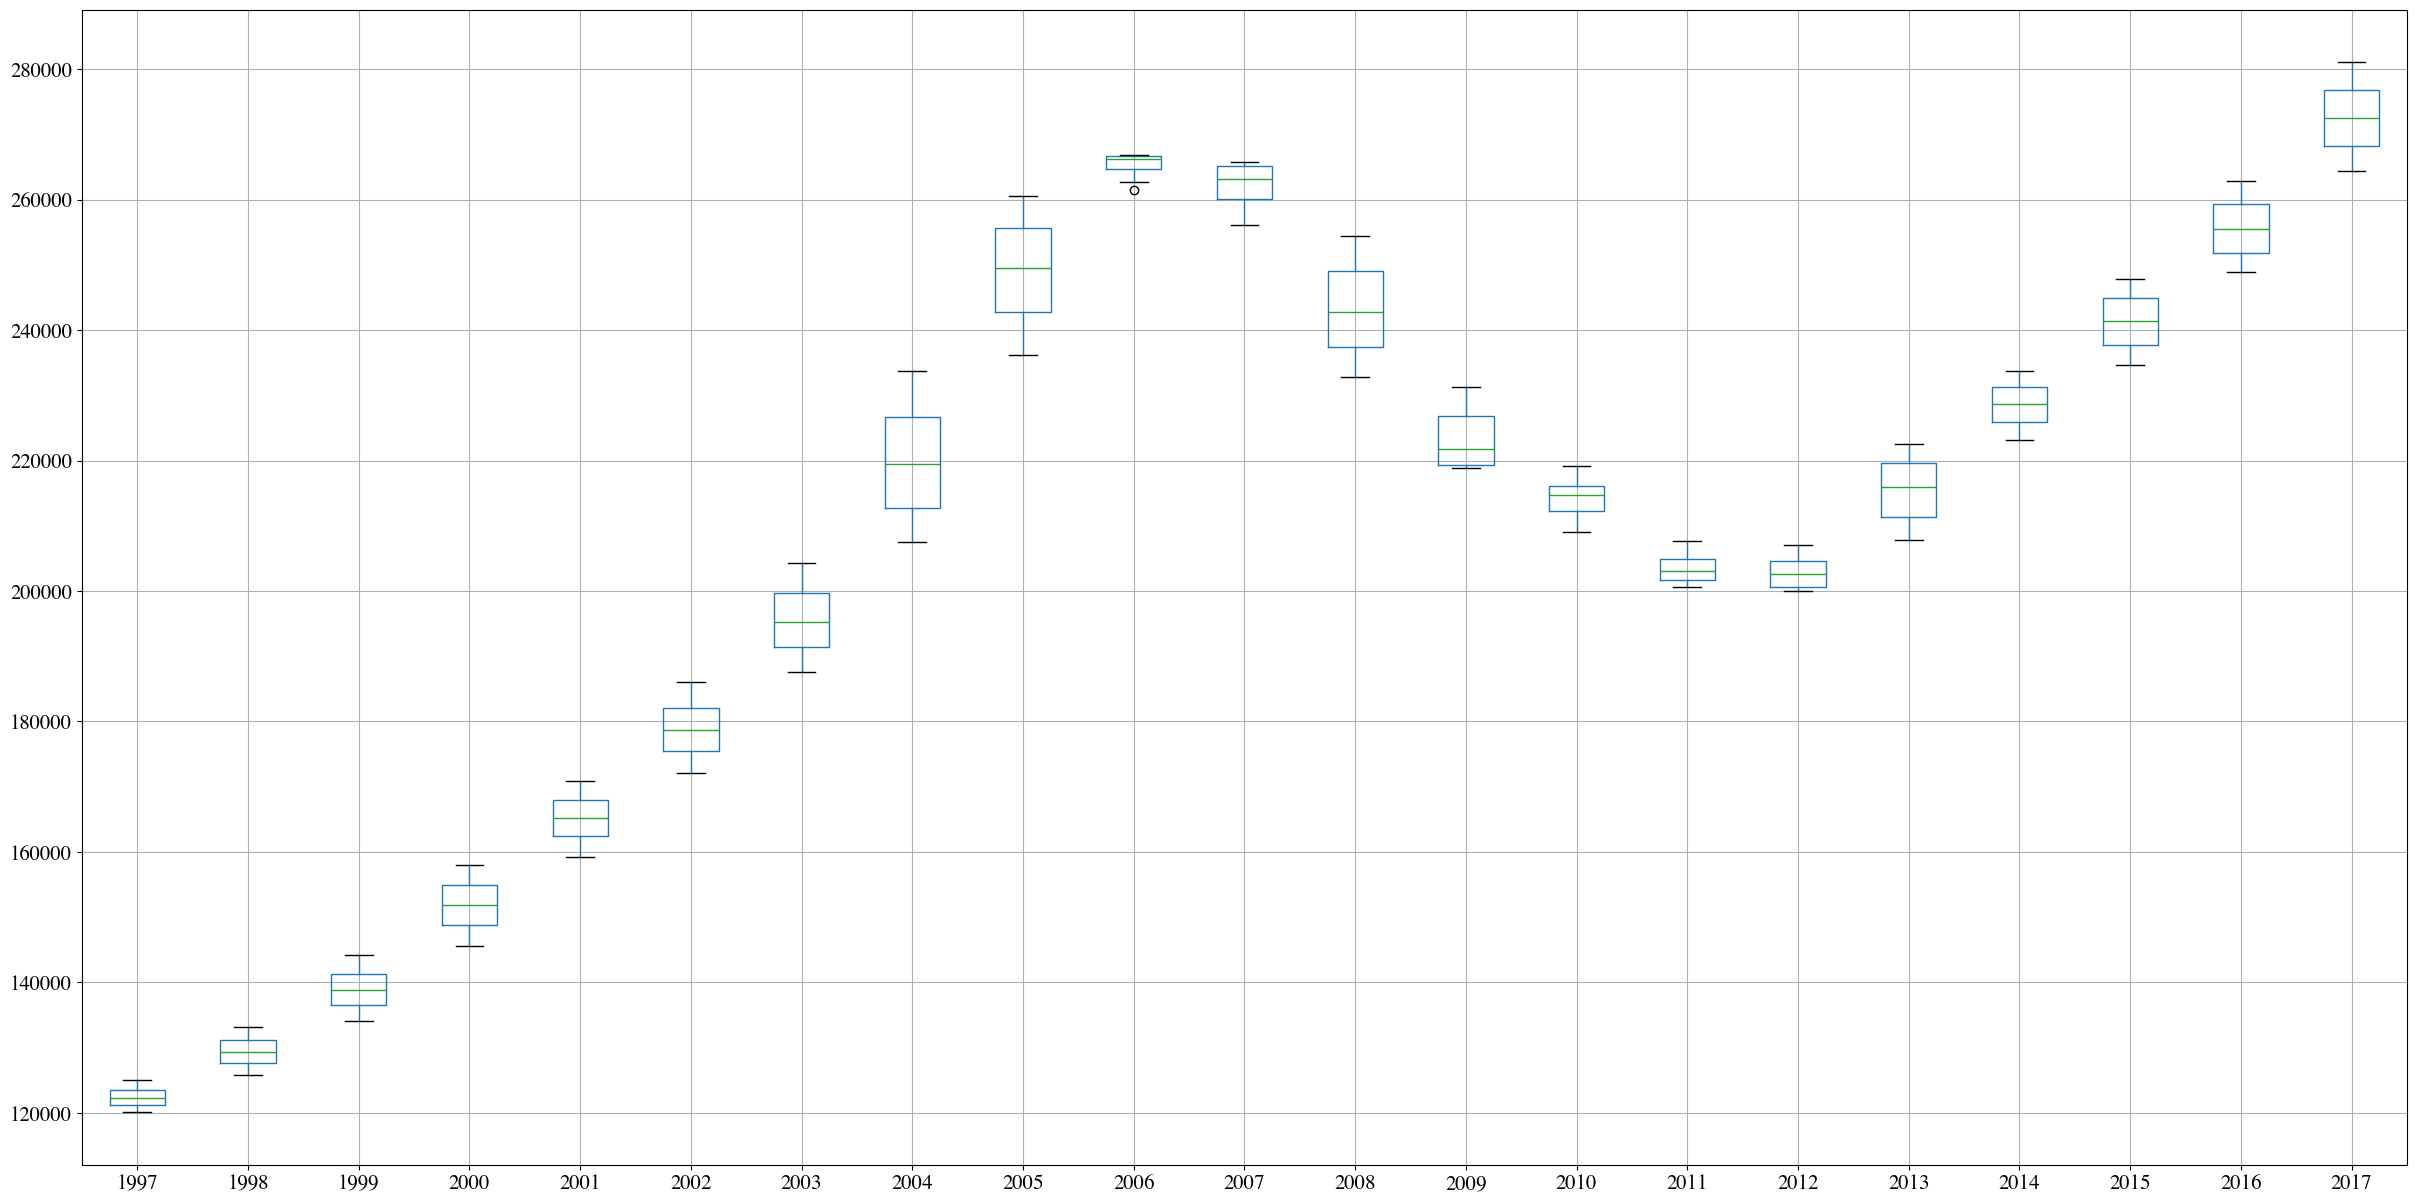

In [195]:
df_annual.boxplot(figsize = (30,15));

/var/folders/s6/jlb2zd1s5gq39tnl2x_y5z_r0000gn/T/ipykernel_54244/2342314222.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(5,2))


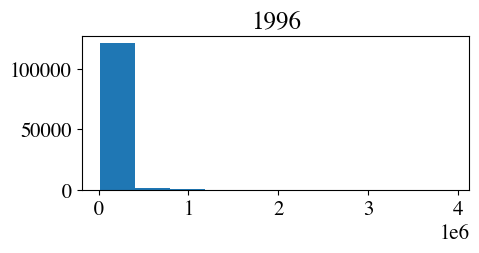

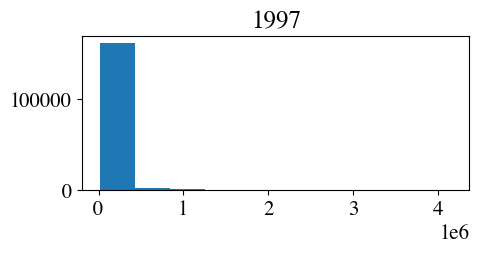

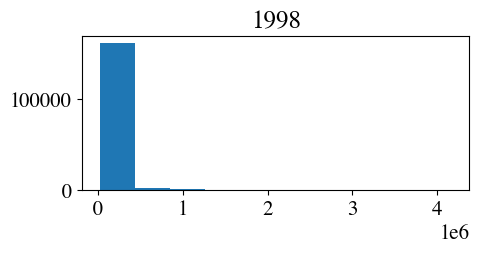

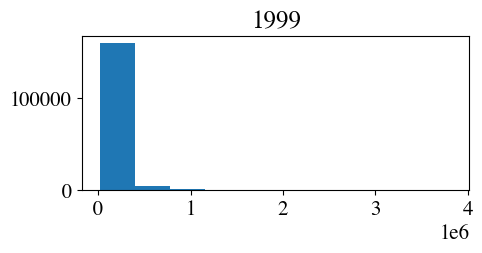

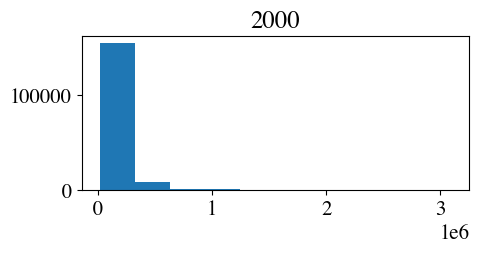

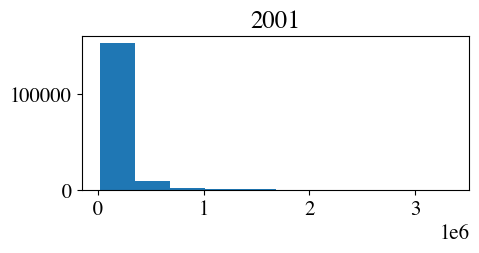

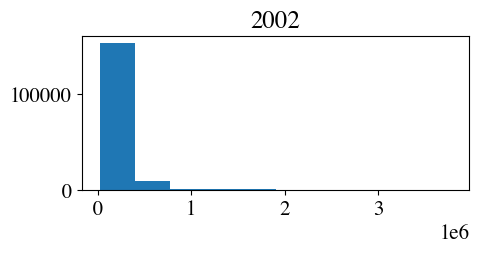

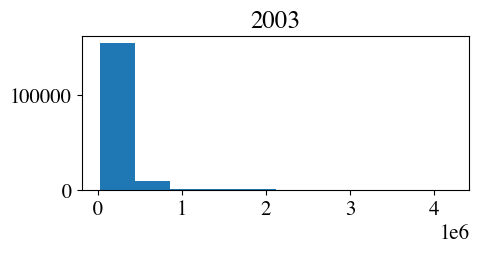

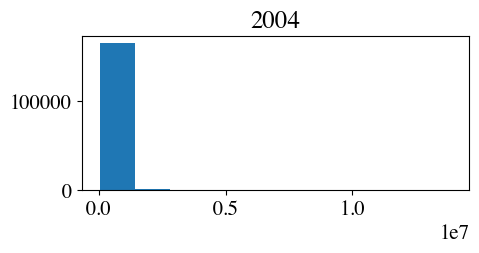

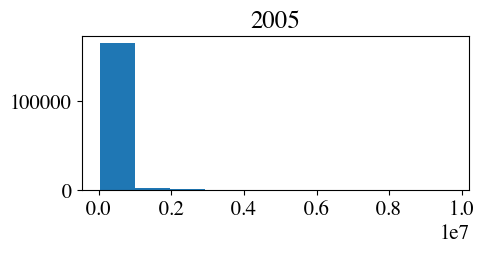

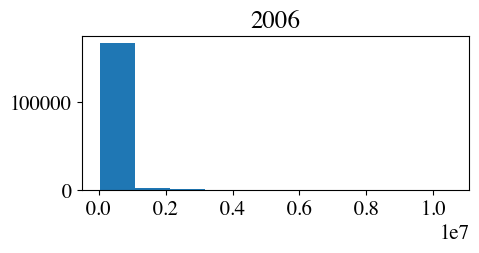

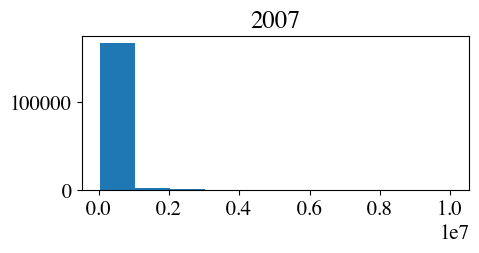

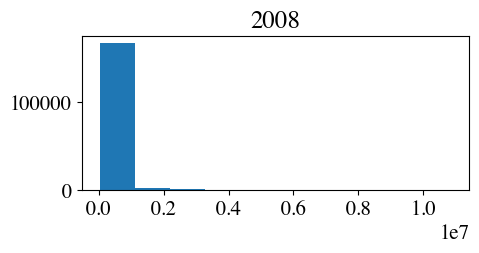

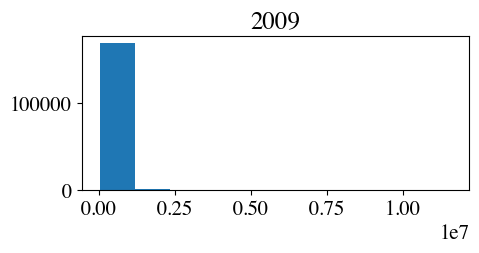

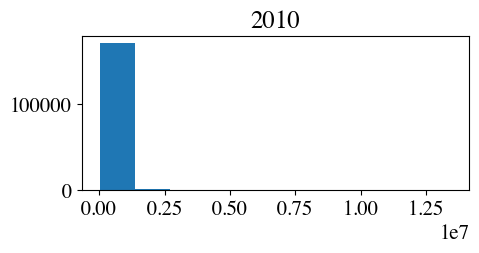

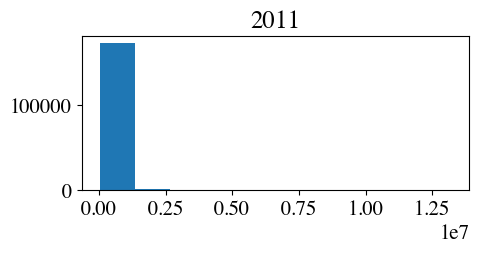

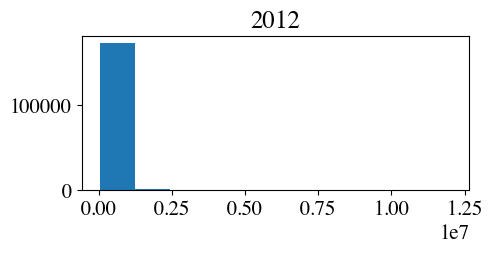

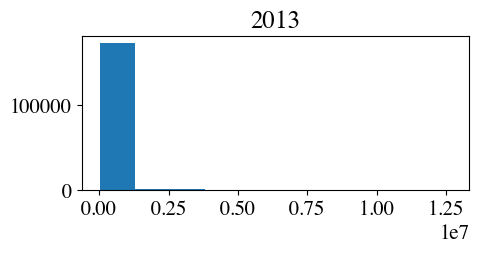

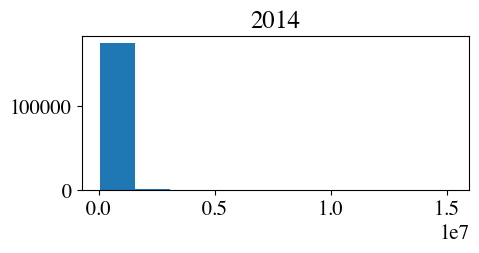

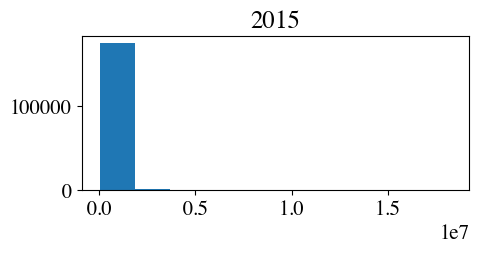

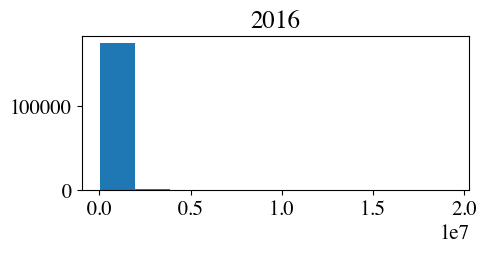

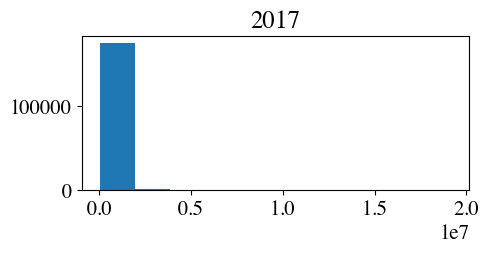

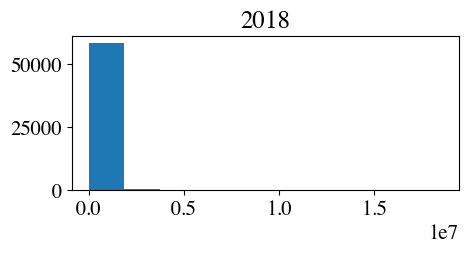

In [188]:
# Create a new DataFrame and store yearly values in columns 
df_annual_grouped = pd.DataFrame()

for yr, group in df_year_groups:
    fig, ax = plt.subplots(figsize=(5,2))
    ax.hist(group.values)
    ax.set_title(yr.year)

In [226]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(grouped)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(-1.8851445183777926, 0.3390815439412539, 2, 262, {'1%': -3.455558114028747, '5%': -2.872635586277424, '10%': -2.572682677000175}, 3505.613476823798)


In [227]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -1.885145
p-value                          0.339082
#Lags Used                       2.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
Critical Value (5%)             -2.872636
Critical Value (10%)            -2.572683
dtype: float64


In [598]:
def decompose(df):
    # Import and apply seasonal_decompose()
    from statsmodels.tsa.seasonal import seasonal_decompose
    decomposition = seasonal_decompose(df)

    # Gather the trend, seasonality, and residuals 
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot gathered statistics
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(np.log(df), label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()

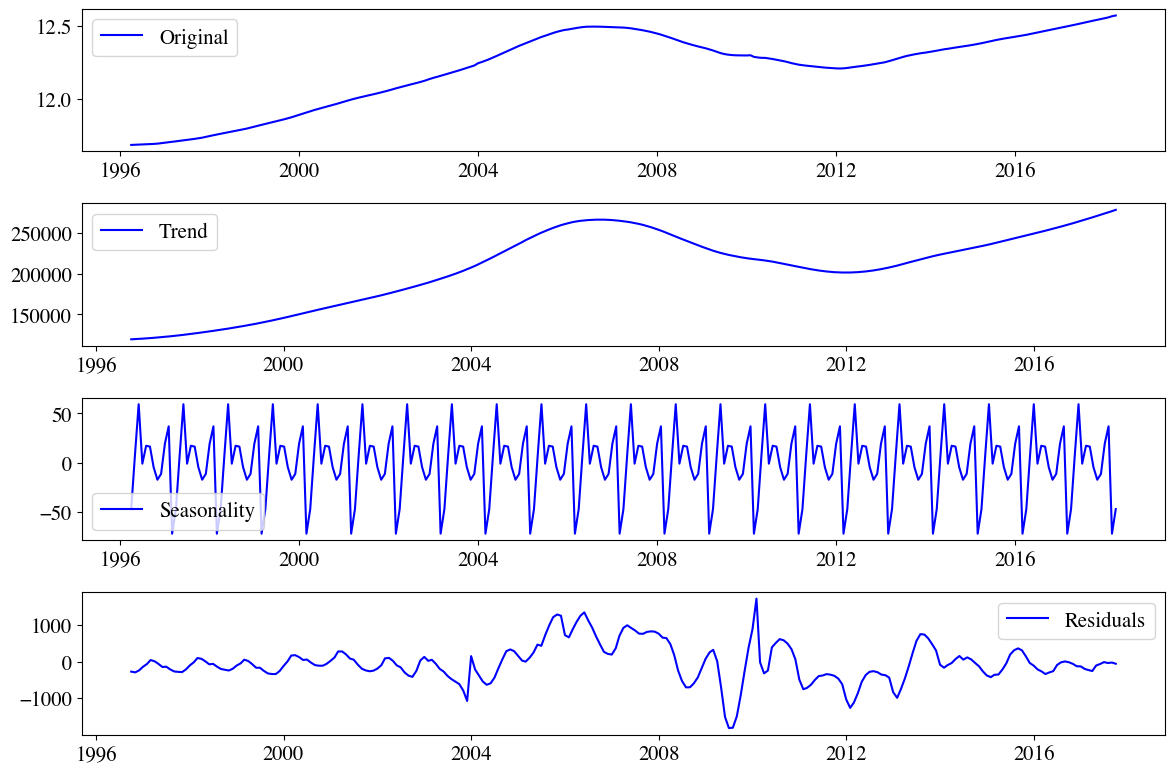

In [570]:
decompose(grouped)

In [346]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(residual[~(residual.isna())])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  -3.132203
p-value                          0.024260
#Lags Used                      10.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


In [347]:
df.RegionName.value_counts()

RegionName
60657    265
75440    265
53128    265
7462     265
97048    265
        ... 
56441     46
47512     46
22625     46
16625     46
28039     46
Name: count, Length: 14723, dtype: int64

<Axes: xlabel='time'>

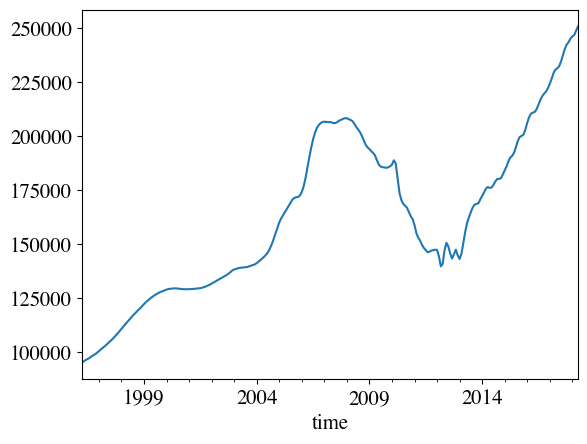

In [348]:
df[df.RegionName == 97048]['value'].plot()

# Eliminating the temporal component of the price variable

In [429]:
sbs = pd.DataFrame(df.value)

sbs['RegionName'] = df['RegionName']

sbs['time'] = sbs.index

sbs.reset_index(drop=True, inplace=True)

sbs['seasonal'] = sbs['time'].map(lambda x: seasonal[x])

sbs['trend'] = sbs['time'].map(lambda x: trend[x])

sbs['trend'] = sbs.trend.fillna(0)

sbs['resid'] = sbs.value - sbs.seasonal - sbs.trend

In [430]:
sbs = sbs.set_index(sbs['time'])

sbs = sbs.drop(['time'], axis=1)

In [431]:
window = sbs[sbs.trend!=0]

In [432]:
window.RegionName.value_counts().head(5)

RegionName
60657    253
75440    253
53128    253
7462     253
97048    253
Name: count, dtype: int64

<Axes: xlabel='time'>

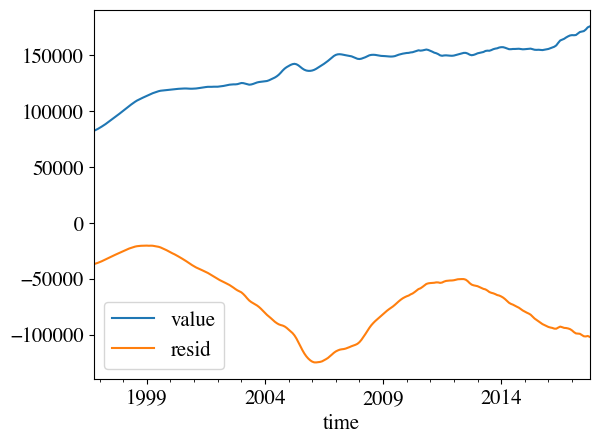

In [433]:
window[window.RegionName == 67052][['value', 'resid']].plot()

In [434]:
window

,value,RegionName,seasonal,trend,resid
time,,,,,
1996-10-01,340400.0,60657,-4.757464,119401.171380,221003.586084
1996-10-01,227300.0,75070,-4.757464,119401.171380,107903.586084
1996-10-01,202500.0,77494,-4.757464,119401.171380,83103.586084
1996-10-01,505300.0,60614,-4.757464,119401.171380,385903.586084
1996-10-01,77600.0,79936,-4.757464,119401.171380,-41796.413916
...,...,...,...,...,...
2017-10-01,218500.0,1338,-4.757464,278099.213532,-59594.456068
2017-10-01,215200.0,3293,-4.757464,278099.213532,-62894.456068
2017-10-01,126700.0,40404,-4.757464,278099.213532,-151394.456068


In [464]:
differences = []
months = []

for zipcode in window.RegionName.unique():
    code = window[window.RegionName == zipcode]['resid']
    difference = code[-1] - code[0]
    differences.append(difference)
    months.append(len(code))

/var/folders/s6/jlb2zd1s5gq39tnl2x_y5z_r0000gn/T/ipykernel_54244/40213342.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = code[-1] - code[0]


In [465]:
differencesdf = pd.DataFrame({'zipcode': window.RegionName.unique(), 'difference': differences, 'months': months})

In [467]:
differencesdf[differencesdf.months==253].sort_values(by='difference', ascending=False)

,zipcode,difference,months
9793,94027,4.942602e+06,253
4705,90210,4.318002e+06,253
1991,94123,3.532802e+06,253
5594,94301,3.505502e+06,253
4616,33480,3.465002e+06,253
...,...,...,...
6681,61071,-1.928980e+05,253
2530,77025,-2.017980e+05,253
12927,61012,-2.017980e+05,253
2863,61008,-2.018980e+05,253


<Axes: xlabel='time'>

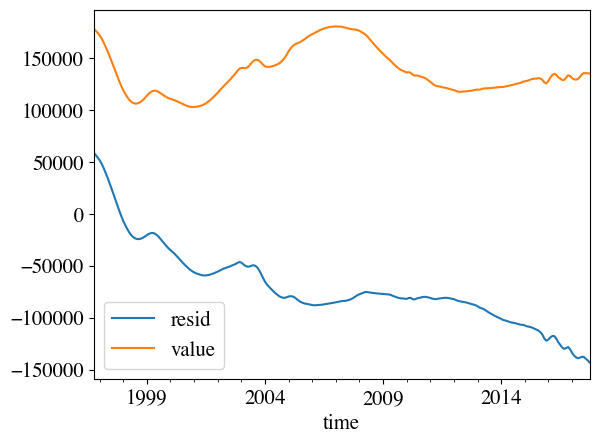

In [476]:
window[window.RegionName == 61008][['resid', 'value']].plot()

# Differenced Series

<Axes: xlabel='time'>

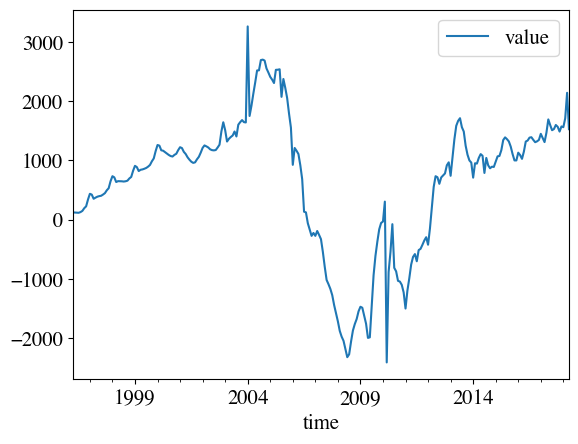

In [478]:
prices_diff = grouped.diff(periods=1)
prices_diff.plot()

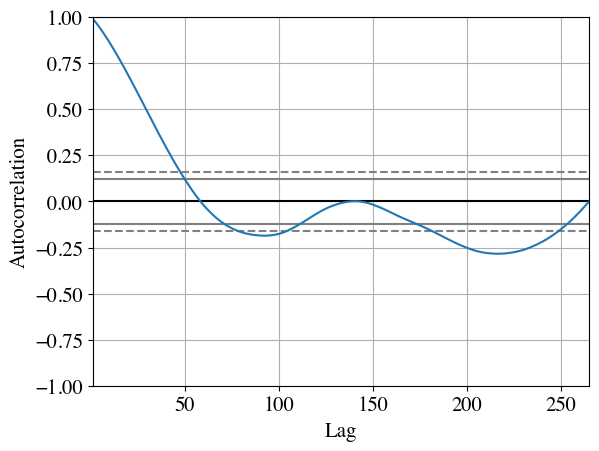

In [483]:
pd.plotting.autocorrelation_plot(grouped.value);

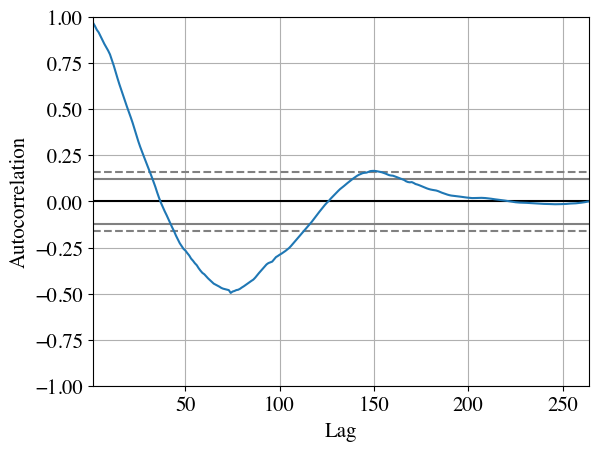

In [490]:
pd.plotting.autocorrelation_plot(grouped.diff(periods=1).value[1:]);

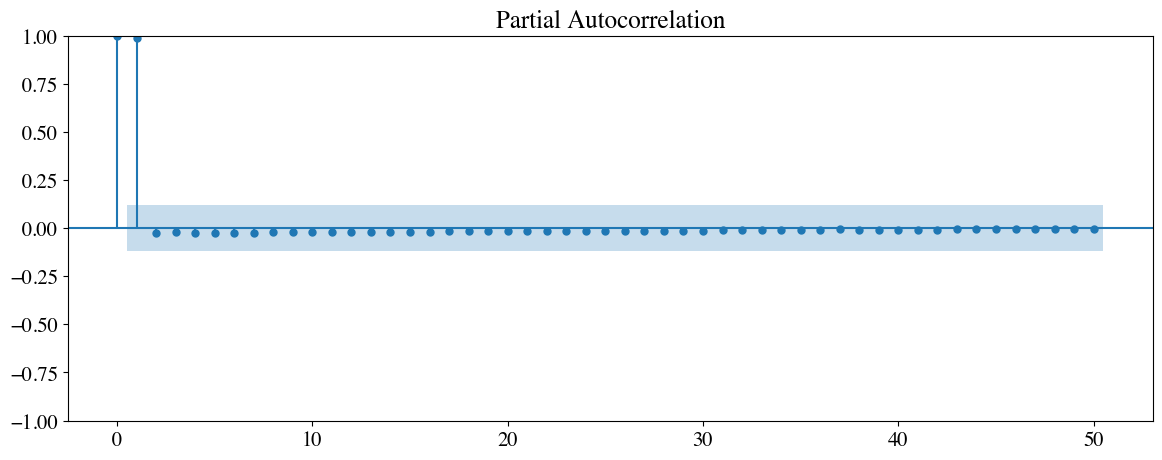

In [492]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(grouped, lags=50);

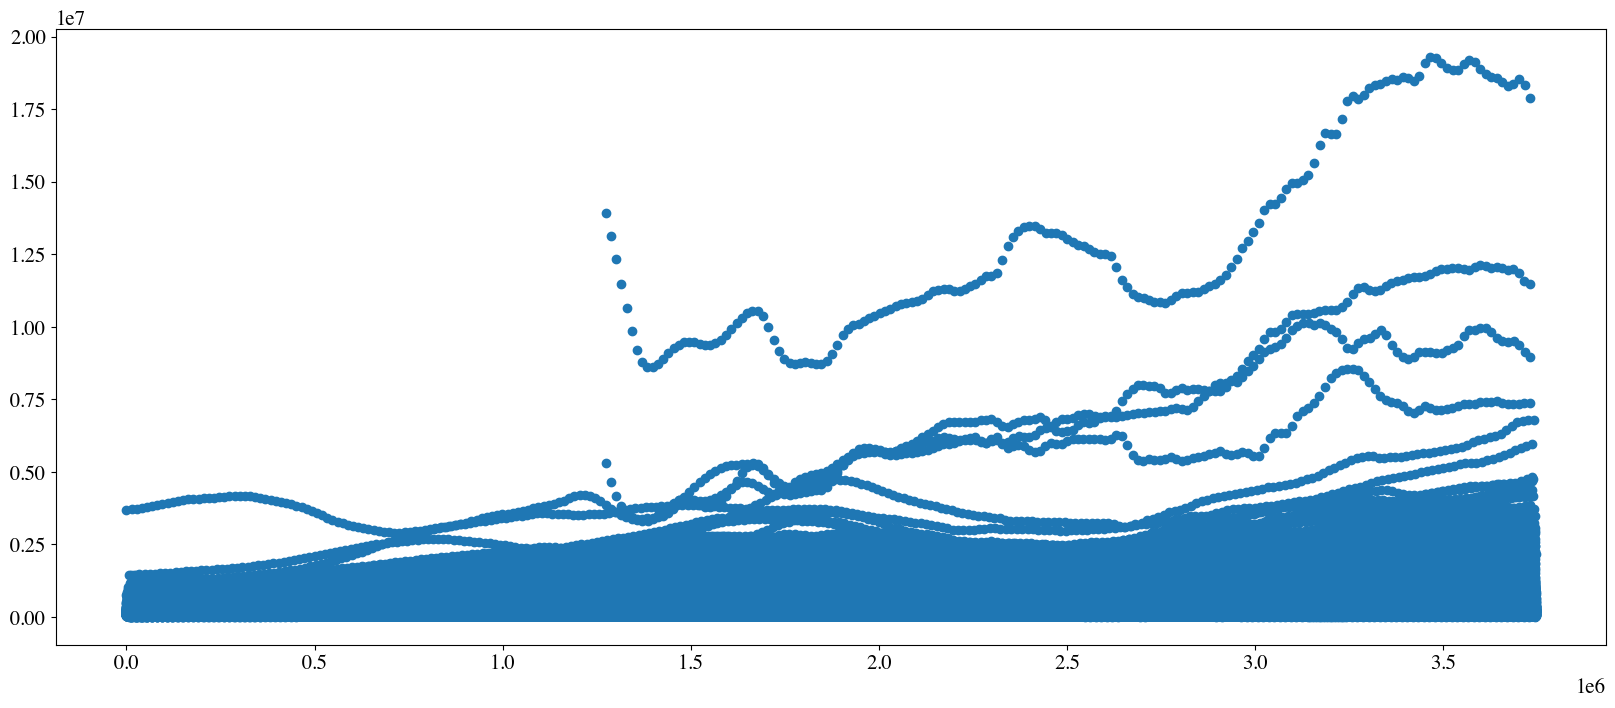

In [497]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(range(len(df)), df.value)

In [521]:
np.random.seed(11)

def random_walk_drift(start, error, drift):
    return start + np.cumsum(error + drift)

In [517]:
(grouped.max() - grouped.min())/len(grouped)

value    640.531401
dtype: float64

<Axes: xlabel='time'>

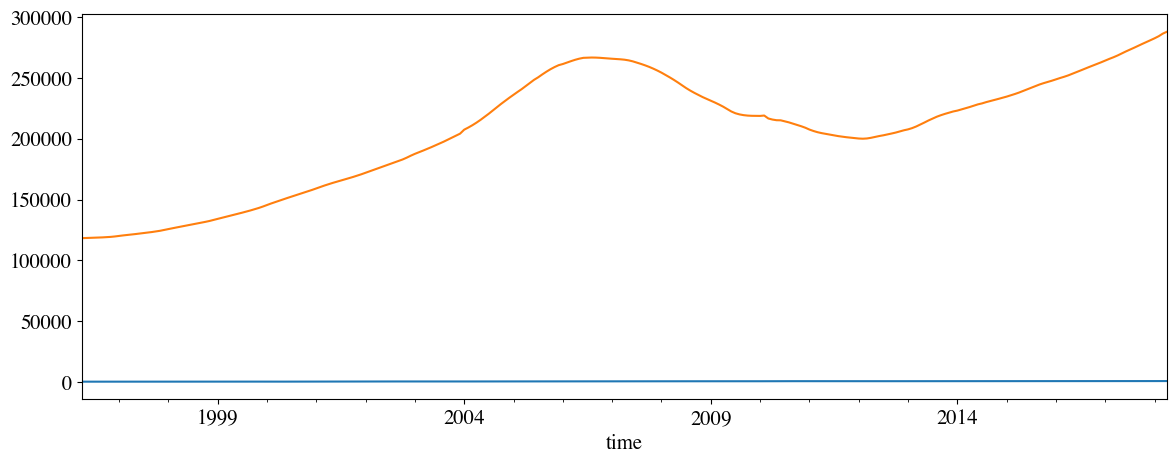

In [514]:
price_drift.plot()
grouped.value.plot()

600.0
610.0
620.0
630.0
640.0
650.0
660.0
670.0
680.0
690.0
700.0


<Axes: xlabel='time'>

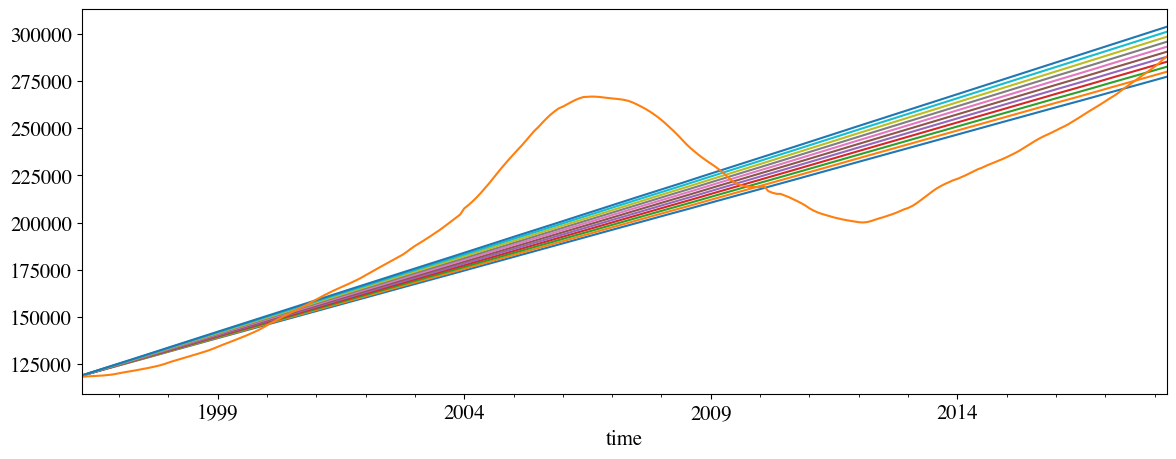

In [532]:
# White noise error term
error = np.random.normal(0, 10, size=len(grouped))

predictions_df = pd.DataFrame({'original': df.value}, index=df.index)
predictions_df['time'] = predictions_df.index
predictions_df.reset_index(drop=True, inplace=True)

for n in np.linspace(600,700, num=11):
    price_value_drift = random_walk_drift(grouped.value.min(), error, n)
    price_drift = pd.Series(price_value_drift, index=grouped.index)
    price_drift.plot()
    
    predictions_df[f"walk_{n}_preds"] = predictions_df['time'].map(lambda x: price_drift[x])
    print(n)
    
grouped.value.plot()

In [533]:
predictions_df

,original,time,walk_600.0_preds,walk_610.0_preds,walk_620.0_preds,walk_630.0_preds,walk_640.0_preds,walk_650.0_preds,walk_660.0_preds,walk_670.0_preds,walk_680.0_preds,walk_690.0_preds,walk_700.0_preds
0,334200.0,1996-04-01,118887.432375,118897.432375,118907.432375,118917.432375,118927.432375,118937.432375,118947.432375,118957.432375,118967.432375,118977.432375,118987.432375
1,235700.0,1996-04-01,118887.432375,118897.432375,118907.432375,118917.432375,118927.432375,118937.432375,118947.432375,118957.432375,118967.432375,118977.432375,118987.432375
2,210400.0,1996-04-01,118887.432375,118897.432375,118907.432375,118917.432375,118927.432375,118937.432375,118947.432375,118957.432375,118967.432375,118977.432375,118987.432375
3,498100.0,1996-04-01,118887.432375,118897.432375,118907.432375,118917.432375,118927.432375,118937.432375,118947.432375,118957.432375,118967.432375,118977.432375,118987.432375
4,77300.0,1996-04-01,118887.432375,118897.432375,118907.432375,118917.432375,118927.432375,118937.432375,118947.432375,118957.432375,118967.432375,118977.432375,118987.432375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3744699,209300.0,2018-04-01,277353.077102,280003.077102,282653.077102,285303.077102,287953.077102,290603.077102,293253.077102,295903.077102,298553.077102,301203.077102,303853.077102
3744700,225800.0,2018-04-01,277353.077102,280003.077102,282653.077102,285303.077102,287953.077102,290603.077102,293253.077102,295903.077102,298553.077102,301203.077102,303853.077102
3744701,133400.0,2018-04-01,277353.077102,280003.077102,282653.077102,285303.077102,287953.077102,290603.077102,293253.077102,295903.077102,298553.077102,301203.077102,303853.077102
3744702,664400.0,2018-04-01,277353.077102,280003.077102,282653.077102,285303.077102,287953.077102,290603.077102,293253.077102,295903.077102,298553.077102,301203.077102,303853.077102


In [534]:
from sklearn.metrics import mean_squared_error
for 

In [ ]:
for n in np.linspace(600,700, num=11):
    

In [537]:
mses = []
rmses = []

for n in np.linspace(600,700, num=11):
    string = f"walk_{n}_preds"
    mse = mean_squared_error(predictions_df.original, predictions_df[string], squared=True)
    rmse = mean_squared_error(predictions_df.original, predictions_df[string], squared=False)
    mses.append(mse)
    rmses.append(rmse)
    
errors = pd.DataFrame({'mse': mses, 'rmse': rmses}, index=np.linspace(600,700, num=11))

/Users/angeloturri/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/angeloturri/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/angeloturri/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/angeloturri/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will

/Users/angeloturri/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/angeloturri/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/angeloturri/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/angeloturri/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will

In [539]:
errors.sort_values(by='rmse', ascending=True)

,mse,rmse
620.0,5.630445e+10,237285.588597
630.0,5.630661e+10,237290.132913
610.0,5.630712e+10,237291.211840
640.0,5.631359e+10,237304.844203
600.0,5.631461e+10,237307.001918
650.0,5.632540e+10,237329.720576
660.0,5.634203e+10,237364.758837
670.0,5.636349e+10,237409.954486
680.0,5.638977e+10,237465.301724
690.0,5.642088e+10,237530.793455


In [541]:
data

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [547]:
for col in data.columns[2:6]:
    print(f"{str(col)}: {data[col].nunique()} values")

City: 7554 values
State: 51 values
Metro: 701 values
CountyName: 1212 values


In [583]:
df.RegionName.value_counts()

RegionName
60657    265
75440    265
53128    265
7462     265
97048    265
        ... 
56441     46
47512     46
22625     46
16625     46
28039     46
Name: count, Length: 14723, dtype: int64

In [605]:
zipcode = df[df.RegionName == 97048]

<Axes: xlabel='time'>

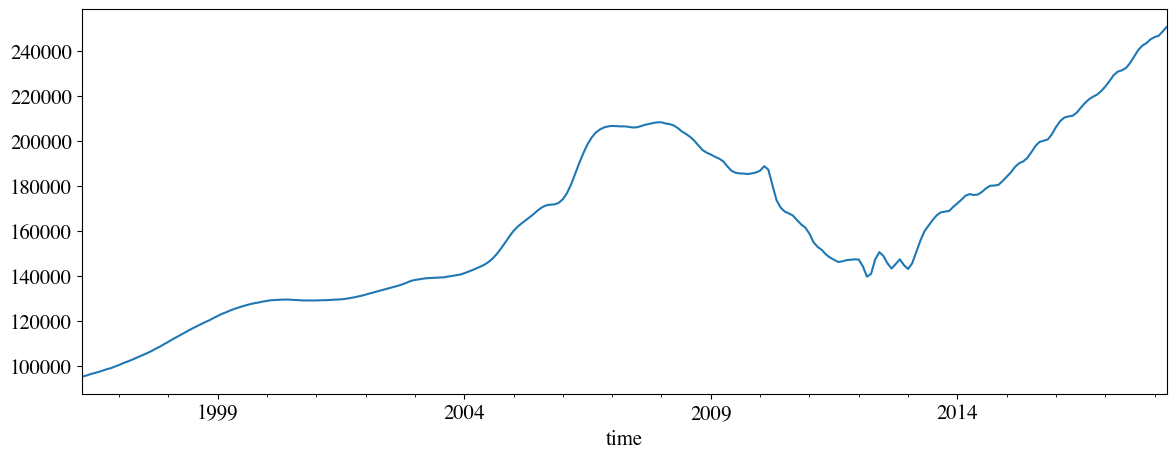

In [606]:
zipcode.groupby('time').value.mean().plot()

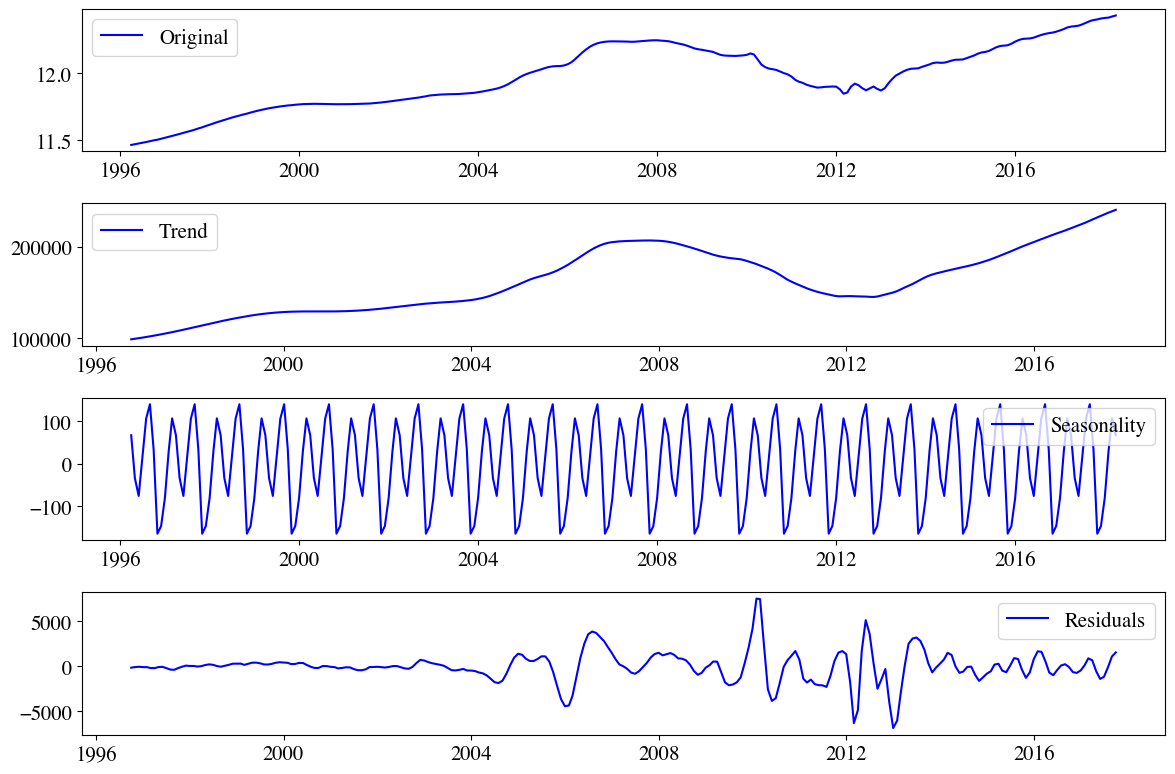

In [607]:
decompose(zipcode.groupby('time').value.mean())